<h1>Make Figures</h1>

In [2]:
import os
import sys
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sys.path.append(os.getcwd() + '/../src/')
import AnalysisTools
reload(AnalysisTools)
dt = AnalysisTools.DataTools()

FitsFolder = os.getcwd()+'/../Fits'
FiguresFolder = os.getcwd()+'/../Figures'
FileList = dt.FileList(FitsFolder,['.hdf'])

##### Functions #####

def LoadData(FileList) :
    Data = list()
    for File in FileList :
        Store = pd.HDFStore(FitsFolder + '/' + File)
        TempData = {'File': File}
        for key in Store.keys() :
            TempData[str.replace(key,'/','')] = Store.get(key)
        Store.close()
        Data.append(TempData)
    
    return Data

##### Print files in folder #####

print('Files in folder:')
for Name in FileList :
    print(Name)

Files in folder:
CO-O-Ru Hor 2-1 - XAS_014_014_D1000_E50 - Pi Star.hdf
CO-O-Ru Hor 2-1 - XAS_014_014_D50_E100 - Trends.hdf
CO-O-Ru Hor 2-1 - XAS_014_014_D50_E200 - Trends.hdf
CO-O-Ru Hor 2-1 - XAS_014_014_D50_E50 - Pi Star.hdf
CO-O-Ru Hor 2-1 - XAS_014_014_D50_E50_N - Pi Star.hdf
CO-O-Ru Ver 2-1 - XAS_000_000_D1000_E50 - Pi Star.hdf
CO-O-Ru Ver 2-1 - XAS_000_000_D50_E100 - Trends.hdf
CO-O-Ru Ver 2-1 - XAS_000_000_D50_E200 - Trends.hdf
CO-O-Ru Ver 2-1 - XAS_000_000_D50_E50 - Pi Star.hdf
CO-O-Ru Ver 2-1 - XAS_000_000_D50_E50_N - Pi Star.hdf


<h2>X-ray data and fits</h2>

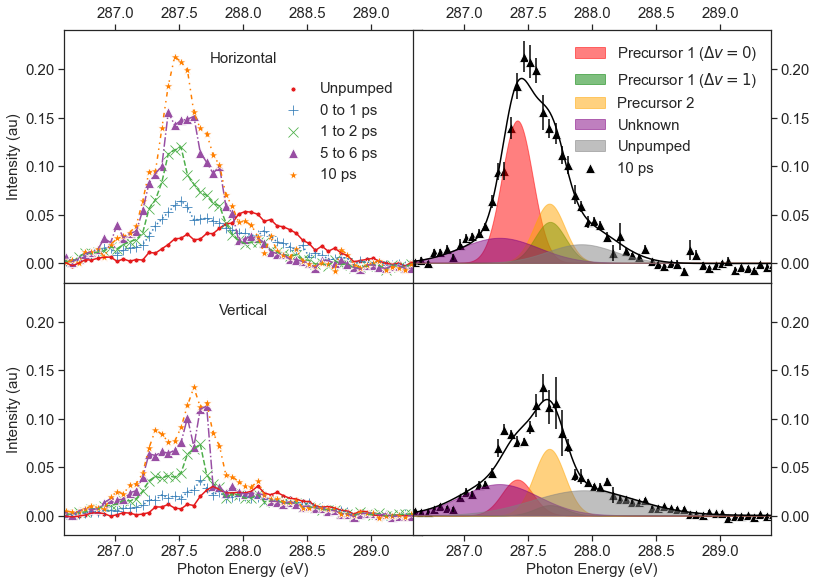

In [143]:
##### Load data #####

Files = list()
Files.append('CO-O-Ru Hor 2-1 - XAS_014_014_D1000_E50 - Pi Star.hdf')
Files.append('CO-O-Ru Ver 2-1 - XAS_000_000_D1000_E50 - Pi Star.hdf')

Data = LoadData(Files)

##### Plot data #####

# Data formatting
symbols = ['.','+','x','^','*','_','o']
linestyle = ['solid','dotted','dashed','dashdot',(0,(3,3,1,3,1,3)),(0,(1,5)),(0,(5,10))]
colors = ['black','blue','red','green','orange','purple','gray']
markersize = 100
fontsize = 15
xlim = [286.6,289.4]
ylim = [-.02,0.24]
Include = [-550.0,400.0,1400.0,5400.0,10400.0]
Labels = ['Unpumped','0 to 1 ps','1 to 2 ps','5 to 6 ps','10 ps']

# Plot data function
def Data2Plot(Data) :
    idx = 0
    for column in Data['Data'] :
        if column in Include :
            label = Labels[idx]
            x = Data['Data'].index
            y = Data['Data'][column].values.astype('float64')
            sns.scatterplot(x=x,y=y,label=label,marker=symbols[idx],color=cm.Set1(idx),s=markersize)
            x = Data['Data'].index
            y = Data['Data'][column].values.astype('float64')
            sns.lineplot(x=x,y=y,label='_'+label+' fs',color=cm.Set1(idx))
            ax.lines[idx].set_linestyle(linestyle[idx])
            idx += 1

# setup plot
sns.set_theme(style="ticks")
fig = plt.figure(figsize=(10, 7))

# First plot
ax = fig.add_subplot(2, 2, 1)

Data2Plot(Data[0])

ax.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
    top=True,
    labeltop=True,
    labelsize = fontsize)
ax.tick_params(axis='y',which='both',labelsize = fontsize)
plt.xlim(xlim[0],xlim[1])
plt.ylim(ylim[0],ylim[1])
plt.ylabel('Intensity (au)',fontsize=fontsize)
plt.title("Horizontal", x=0.5, y=0.85,fontsize=fontsize)
plt.legend(frameon=False, fontsize=fontsize, bbox_to_anchor=(0.56,0.85), loc="upper left")

# Second plot
ax = fig.add_subplot(2, 2, 3)

Data2Plot(Data[1])

ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize)
plt.xlim(xlim[0],xlim[1])
plt.ylim(ylim[0],ylim[1])
plt.xlabel('Photon Energy (eV)',fontsize=fontsize)
plt.ylabel('Intensity (au)',fontsize=fontsize)
plt.title("Vertical", x=0.5, y=0.85,fontsize=fontsize)
plt.legend(frameon=False, fontsize=fontsize)
ax.legend().set_visible(False)

##### Plot fits #####

# Data formatting
symbols = ['^','.','+','x','*','_','o']
linestyle = ['solid','dotted','dashed','dashdot',(0,(3,3,1,3,1,3)),(0,(1,5)),(0,(5,10))]
colors = ['black','blue','red','green','orange','purple','gray','teal']
markersize = 100
xlim = [286.6,289.4]
ylim = [-.02,0.24]
Include = [10400.0]
Labels = ['10 ps']

# Plot data function
def Data2Plot(Data) :
    idx = 0
    for column in Data['Fits'] :
        if column in Include :
            label = Labels[idx]
            x = Data['Fits'].index
            y = Data['Fits'][column].values.astype('float64')
            sns.lineplot(x=x,y=y,label='_'+label+' fs',color=colors[idx])
            x = Data['Data'].index
            y = Data['Data'][column].values.astype('float64')
            yerr = Data['ErrorBars'][column].values.astype('float64')
            sns.scatterplot(x=x,y=y,label=label,marker=symbols[idx],color=colors[idx],s=markersize)
            ax.lines[idx].set_linestyle(linestyle[idx])
            plt.errorbar(x, y, yerr,linestyle='',fmt='',color=colors[idx])
            
            TempData = pd.DataFrame(index=Data['Fits'].index)
            for key in Data['Fits_Components'] :
                TempData[key] = Data['Fits_Components'][key].loc[column]
            Unpumped_Names = [key for key in TempData.columns if 'Unpumped' in key]
            Unpumped = TempData[Unpumped_Names]
            Unpumped = np.mean(Unpumped,axis=1)
            TempData['Unpumped'] = Unpumped
            TempData = TempData.drop(Unpumped_Names,axis=1)
            Assignments = Data['Fits_Assignments']
            Assignments.loc['Unpumped'] = 'Unpumped'
            Assignments = Assignments.drop(Unpumped_Names,axis=0)
            for i, component in enumerate(TempData) :
                if component != 'Baseline' :
                    x = Data['Fits'].index
                    y = TempData[component]
                    plt.fill(x,y,label=Assignments.loc[component][0],alpha=0.5,color=colors[i+1])
            idx += 1

# third plot
ax = fig.add_subplot(2, 2, 2)

Data2Plot(Data[0])

ax.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
    top=True,
    labeltop=True,
    labelsize = fontsize)
ax.tick_params(
    axis='y',
    which='both',
    left=False,
    labelleft=False,
    right=True,
    labelright=True,
    labelsize = fontsize)
ax.tick_params(axis='y',which='both',labelsize = fontsize)
plt.xlim(xlim[0],xlim[1])
plt.ylim(ylim[0],ylim[1])
plt.legend(frameon=False, fontsize=fontsize)

# fourth plot
ax = fig.add_subplot(2, 2, 4)

Data2Plot(Data[1])

ax.tick_params(
    axis='y',
    which='both',
    left=False,
    labelleft=False,
    right=True,
    labelright=True,
    labelsize = fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize)
plt.xlim(xlim[0],xlim[1])
plt.ylim(ylim[0],ylim[1])
plt.xlabel('Photon Energy (eV)',fontsize=fontsize)
plt.legend(frameon=False, fontsize=fontsize)
ax.legend().set_visible(False)

# Format plot
fig.tight_layout(pad=-2.75,h_pad=0)

# Save figure
plt.savefig(FiguresFolder + '/Data.png')

# # Show plot
plt.show()

<h2>Trends from fits</h2>

Files:
    CO-O-Ru Hor 2-1 - XAS_014_014_D50_E100 - Trends.hdf
    CO-O-Ru Ver 2-1 - XAS_014_014_D50_E100 - Trends.hdf


KeyError: 'FitsParameters'

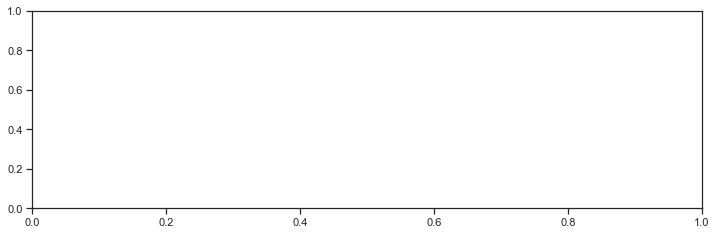

In [4]:
##### Load data #####

Files = list()
Files.append('CO-O-Ru Hor 2-1 - XAS_014_014_D50_E50 - Pi Star.hdf')
Files.append('CO-O-Ru Ver 2-1 - XAS_000_000_D50_E50 - Pi Star.hdf')

Data = LoadData(Files)

print('Files:')
for file in Files :
    print('    '+file)

# Adjust delay
# for DataSet in Data :
#     DataSet['Data'].columns = DataSet['Data'].columns+100

##### Plot data #####

# Data to exclude
Exclude = ['Baseline','Unpumped2']

# Data formatting
symbols = ['.','+','x','^','*','_','o']
linestyle = ['solid','dotted','dashed','dashdot',(0,(3,3,1,3,1,3)),(0,(1,5)),(0,(5,10))]
colors = ['black','blue','red','green','orange','purple','gray']
markersize = 100
fontsize = 16
xlim = [-1000,11000]
ylim = [-0.005,0.055]

# Plot data function
def Data2Plot(Data) :
    idx = 0
    for j, column in enumerate(Data['Fits_Parameters']) :
        if 'amplitude' in column :
            Feature = column.split('_')[0]
            Assignment = Data['Fits_Assignments']['Assignment'].loc[Feature]
            if Feature in Exclude or Assignment in Exclude :
                pass
            else :
                label = Data['Fits_Assignments'].loc[Feature].values[0]
                x = Data['Fits_Parameters'].index
                y = Data['Fits_Parameters'][column].values.astype('float64')
                sns.scatterplot(x=x,y=y,label=label,marker=symbols[idx],color=cm.Set1(idx),s=markersize)
                x = Data['Fits_TrendFits'].index
                y = Data['Fits_TrendFits'][column].values.astype('float64')
                sns.lineplot(x=x,y=y,label='_'+label,color=cm.Set1(idx))
                ax.lines[idx].set_linestyle(linestyle[idx])
                idx += 1

# setup plot
sns.set_theme(style="ticks")
fig = plt.figure(figsize=(12, 8))

# First plot
ax = fig.add_subplot(2, 1, 1)

Data2Plot(Data[0])

ax.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
    top=True,
    labeltop=True,
    labelsize = fontsize)
ax.tick_params(axis='y',which='both',labelsize = fontsize)
plt.xlim(xlim[0],xlim[1])
plt.ylim(ylim[0],ylim[1])
plt.ylabel('Intensity (au)',fontsize=fontsize)
plt.title("Horizontal", x=0.5, y=0.9,fontsize=fontsize)
plt.legend(frameon=False, fontsize=fontsize, bbox_to_anchor=(0.7,1), loc="upper left")

# Second plot
ax = fig.add_subplot(2, 1, 2)

Data2Plot(Data[1])

ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize)
plt.xlim(xlim[0],xlim[1])
plt.ylim(ylim[0],ylim[1])
plt.xlabel('Delay (fs)',fontsize=fontsize)
plt.ylabel('Intensity (au)',fontsize=fontsize)
plt.title("Vertical", x=0.5, y=0.9,fontsize=fontsize)
plt.legend(frameon=False, fontsize=fontsize)
ax.legend().set_visible(False)

fig.tight_layout(h_pad=0)

# Save figure
plt.savefig(FiguresFolder + '/Trends from Fits.svg')

# Show plot
plt.show()

<h2>Trends from data</h2>

In [23]:
for key in Data[0] :
    print(key)

File
Data
TrendFits
TrendParameters
Trends


Files:
    CO-O-Ru Hor 2-1 - XAS_014_014_D50_E100 - Trends.hdf
    CO-O-Ru Ver 2-1 - XAS_000_000_D50_E100 - Trends.hdf


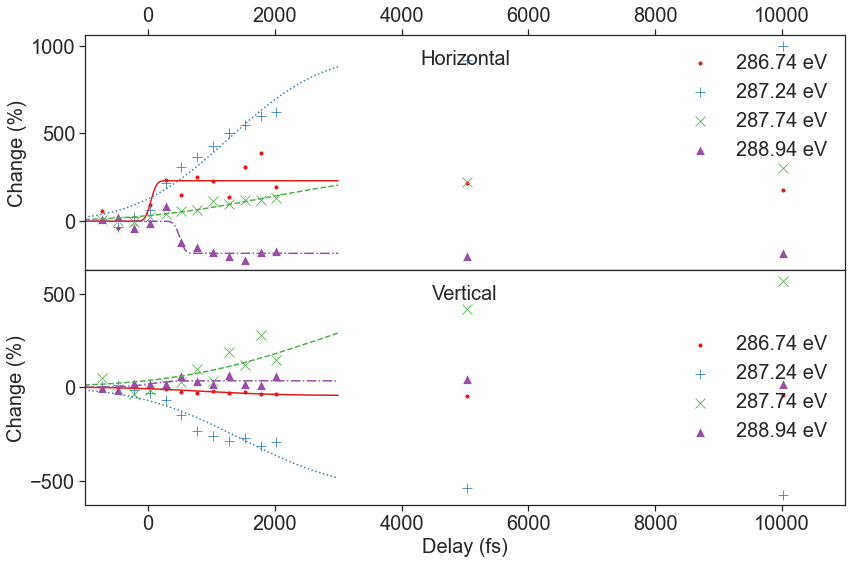

In [30]:
##### Load data #####

Files = list()
Files.append('CO-O-Ru Hor 2-1 - XAS_014_014_D50_E100 - Trends.hdf')
Files.append('CO-O-Ru Ver 2-1 - XAS_000_000_D50_E100 - Trends.hdf')

Data = LoadData(Files)

print('Files:')
for file in Files :
    print('    '+file)

##### Plot data #####

# Data formatting
symbols = 5*['.','+','x','^','*','_','o']
linestyle = 5*['solid','dotted','dashed','dashdot',(0,(3,3,1,3,1,3)),(0,(1,5)),(0,(5,10))]
colors = 5*['black','blue','red','green','orange','purple','gray']
markersize = 100
fontsize = 20
xlim = [-1000,11000]
ylim = [-150,790]

# Data to include
Include = [286.74,287.24,287.74,288.94]

# Plot data function
def Data2Plot(Data) :
    idx = 0
    for column in Data['Trends'] :
        if Include == 'All' :
            Show = True
        elif column in Include :
            Show = True
        else :
            Show = False
        if Show :
            label = str(column)+' eV'
            x = Data['Trends'].index
            y = Data['Trends'][column].values.astype('float64')
            sns.scatterplot(x=x,y=y,label=label,marker=symbols[idx],color=cm.Set1(idx),s=markersize)
            x = Data['TrendFits'].index
            y = Data['TrendFits'][column].values.astype('float64')
            sns.lineplot(x=x,y=y,label='_'+label,color=cm.Set1(idx))
            ax.lines[idx].set_linestyle(linestyle[idx])
            idx += 1

# setup plot
sns.set_theme(style="ticks")
fig = plt.figure(figsize=(12, 8))

# First plot
ax = fig.add_subplot(2, 1, 1)

Data2Plot(Data[0])

ax.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
    top=True,
    labeltop=True,
    labelsize = fontsize)
ax.tick_params(axis='y',which='both',labelsize = fontsize)
plt.xlim(xlim[0],xlim[1])
# plt.ylim(ylim[0],ylim[1])
plt.ylabel('Change (%)',fontsize=fontsize)
plt.title("Horizontal", x=0.5, y=0.85,fontsize=fontsize)
plt.legend(frameon=False, fontsize=fontsize)

# second plot
ax = fig.add_subplot(2, 1, 2)

Data2Plot(Data[1])

ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize)
plt.xlim(xlim[0],xlim[1])
# plt.ylim(ylim[0],ylim[1])
plt.xlabel('Delay (fs)',fontsize=fontsize)
plt.ylabel('Change (%)',fontsize=fontsize)
plt.title("Vertical", x=0.5, y=0.85,fontsize=fontsize)
plt.legend(frameon=False, fontsize=fontsize)
# ax.legend().set_visible(False)

# Figure formatting
fig.tight_layout(h_pad=0)

# Save figure
plt.savefig(FiguresFolder + '/Trends from Data.svg')

# Show plot
plt.show()

In [94]:
print('Horizontal:')
display(Data[0]['TrendParameters'])

Horizontal:


,a,b,t0,sigma
Low,98.683227,0.0,100.000000,264.698976
Precursor1,361.242439,0.0,1114.017282,1462.766086
Precursor2,232.464921,0.0,1593.981450,1849.157636
Unpumped,-42.557120,0.0,344.135539,557.375981


In [197]:
print:('Vertical:')
display(Data[1]['TrendParameters'])

,a,b,t0,sigma
Low,188.383912,0.0,477.829601,608.944393
Precursor1,306.015046,0.0,1442.299335,1451.458434
Precursor2,353.407615,0.0,1124.665880,1122.289020
Unpumped,-15.859141,0.0,228.543717,313.843157
